# Problem 6 - Batch Normalization, Dropout, MNIST

Batch normalization and Dropout are used as effective regularization techniques. However its not clear which one should be preferred and whether their benefits add up when used in conjunction. In this problem we will compare batch normalization, dropout, and their conjunction using MNIST and LeNet-5 (see e.g., http://yann.lecun.com/exdb/lenet/). LeNet-5 is one of the earliest convolutional neural network developed for image classification and its implementation in all major framework is available. You can refer to Lecture 3 slides for definition of standardization and batch normalization.


1. Explain the terms co-adaptation and internal covariance-shift. Use examples if needed. You may need to refer to two papers mentioned below to answer this question. (Papers are in my ipad)

2. Batch normalization is traditionally used in hidden layers, for input layer standard normalization is used. In standard normalization the mean and standard deviation are calculated using the entire training dataset whereas in batch normalization these statistics are calculated for each mini-batch. Train LeNet-5 with standard normalization of input and batch normalization for hidden layers. What are the learned batch norm parameters for each layer ?

In [42]:
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization

from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = tf.pad(X_train, [[0, 0], [2,2], [2,2]])/255
X_test = tf.pad(X_test, [[0, 0], [2,2], [2,2]])/255

X_train = tf.expand_dims(X_train, axis=3, name=None)
X_test = tf.expand_dims(X_test, axis=3, name=None)

#testing
# adapt_data =X_train
# input_data = X_train
# layer = tf.keras.layers.Normalization(axis=None)
# layer.adapt(adapt_data)

# layer(input_data)

# print(X_train.shape)
model1 = Sequential()
# model.add(norm_layer)
model1.add(tf.keras.layers.Normalization(axis=None,input_shape=  X_train.shape[1:]))
model1.add(Conv2D(6, 5, activation='tanh',input_shape=  X_train.shape[1:] ))

model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.AveragePooling2D(2))
model1.add(Conv2D(16, 5, padding='valid', activation='tanh'))

model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.AveragePooling2D(2))
model1.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))


model1.add(Flatten())
model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(84, activation='tanh'))

model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(10, activation='softmax'))

(60000, 32, 32, 1)


In [43]:
model1.build()
model1.summary()
model1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model_history1 = model1.fit(X_train, Y_train,epochs= 15,batch_size=100,validation_data=(X_test, Y_test))

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 32, 32, 1)        3         
 ion)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 batch_normalization_47 (Bat  (None, 28, 28, 6)        24        
 chNormalization)                                                
                                                                 
 average_pooling2d_22 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_38 (Conv2D)          (None, 10, 10, 16)        2416      
                                                     

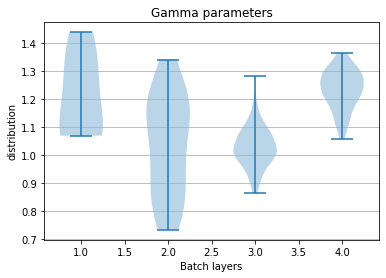

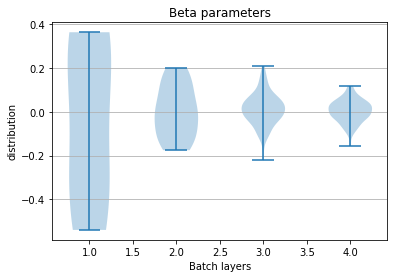

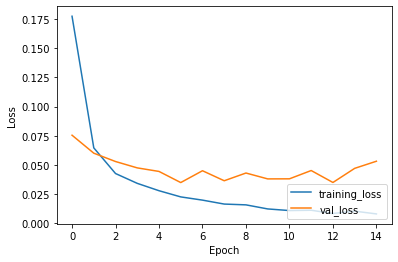

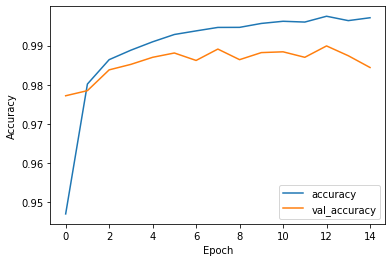

313/313 - 2s - loss: 0.0532 - accuracy: 0.9844 - 2s/epoch - 7ms/step


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots()

axes.violinplot(dataset = [model1.layers[2].gamma,
                           model1.layers[5].gamma,
                           model1.layers[9].gamma,
                           model1.layers[11].gamma,
                           ])

axes.set_title('Gamma parameters')
axes.yaxis.grid(True)
axes.set_xlabel('Batch layers')
axes.set_ylabel('distribution')

plt.show()
fig, axes = plt.subplots()

axes.violinplot(dataset = [model1.layers[2].beta,
                           model1.layers[5].beta,
                           model1.layers[9].beta,
                           model1.layers[11].beta,
                           ] )

axes.set_title('Beta parameters')
axes.yaxis.grid(True)
axes.set_xlabel('Batch layers')
axes.set_ylabel('distribution')

plt.show()
# you need to plot the violin plots.

plt.plot(model_history1.history['loss'], label='training_loss')
plt.plot(model_history1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

plt.plot(model_history1.history['accuracy'], label='accuracy')
plt.plot(model_history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model1.evaluate(X_test, Y_test, verbose=2)


3. Next instead of standard normalization use batch normalization for input layer also and train the network. Plot the distribution of learned batch norm parameters for each layer (including input) using violin plots. Compare the train/test accuracy and loss for the two cases ? Did batch normalization for input layer improve performance ? 

In [25]:

# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()



# print(X_train.shape[1:])
model2 = Sequential()
# model.add(norm_layer)
model2.add(tf.keras.layers.BatchNormalization(input_shape=  X_train.shape[1:]))

model2.add(Conv2D(6, 5, activation='tanh',input_shape=  X_train.shape[1:] ))

model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.AveragePooling2D(2))
model2.add(Conv2D(16, 5, padding='valid', activation='tanh'))




model2.add(tf.keras.layers.AveragePooling2D(2))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))

model2.add(Flatten())
model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(84, activation='tanh'))

model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(10, activation='softmax'))

In [26]:
model2.build()
model2.summary()
model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model_history2 = model2.fit(X_train, Y_train,epochs= 15,batch_size=100,validation_data=(X_test, Y_test))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_33 (Bat  (None, 32, 32, 1)        4         
 chNormalization)                                                
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 batch_normalization_34 (Bat  (None, 28, 28, 6)        24        
 chNormalization)                                                
                                                                 
 average_pooling2d_14 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_26 (Conv2D)          (None, 10, 10, 16)        2416      
                                                     

313/313 - 2s - loss: 0.0443 - accuracy: 0.9868 - 2s/epoch - 6ms/step


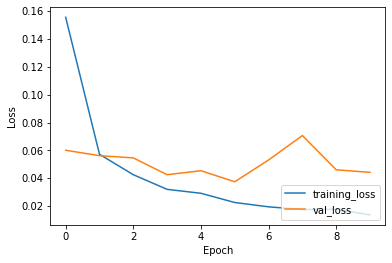

In [28]:
# outputs = [layer.output for layer in model2.layers] 
# outputs


# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots()

# axes.violinplot(dataset = [model2.layers[0].gamma,
#                            model2.layers[2].gamma,
#                            model2.layers[5].gamma,
#                            model2.layers[9].gamma,
#                            model2.layers[11].gamma,
#                            ])

# axes.set_title('Gamma parameters')
# axes.yaxis.grid(True)
# axes.set_xlabel('Batch layers')
# axes.set_ylabel('distribution')

# plt.show()
# fig, axes = plt.subplots()

# axes.violinplot(dataset = [model2.layers[0].beta,
#                            model2.layers[2].beta,
#                            model2.layers[5].beta,
#                            model2.layers[9].beta,ß
#                            model2.layers[11].beta,
#                            ])

# axes.set_title('Beta parameters')
# axes.yaxis.grid(True)
# axes.set_xlabel('Batch layers')
# axes.set_ylabel('distribution')

# plt.show()
# # you need to plot the violin plots.

# plt.plot(model_history2.history['loss'], label='training_loss')
# plt.plot(model_history2.history['val_loss'], label = 'val_loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='lower right')
# test_loss, test_acc = model2.evaluate(X_test, Y_test, verbose=2)

 Compare the train/test accuracy and loss for the two cases ? Did batch normalization for input layer improve performance ? 

 Plotting the 2 models.

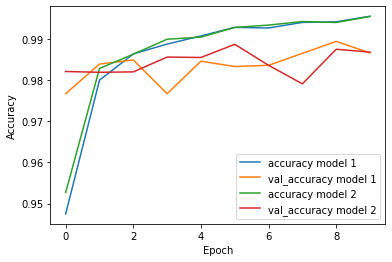

313/313 - 1s - loss: 0.0419 - accuracy: 0.9866 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0443 - accuracy: 0.9868 - 1s/epoch - 4ms/step


In [29]:
plt.plot(model_history1.history['accuracy'], label='accuracy model 1')
plt.plot(model_history1.history['val_accuracy'], label = 'val_accuracy model 1')
plt.plot(model_history2.history['accuracy'], label='accuracy model 2')
plt.plot(model_history2.history['val_accuracy'], label = 'val_accuracy model 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model1.evaluate(X_test, Y_test, verbose=2)
test_loss, test_acc = model2.evaluate(X_test, Y_test, verbose=2)


4. Train the network without batch normalization but this time use dropout. For hidden layers use dropout probability of 0.5 and for input layer take it to be 0.2 Compare test accuracy using dropout to test accuracy obtained using batch normalization in part 2 and 3.

no batch normal not normalization with dropout

In [30]:



model3 = Sequential()

model3.add(tf.keras.layers.Dropout(0.5,input_shape=X_train.shape[1:]))
model3.add(Conv2D(6, 5, activation='tanh', padding='same', input_shape=X_train.shape[1:]))
model3.add(tf.keras.layers.AveragePooling2D(2))

model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))
model3.add(tf.keras.layers.AveragePooling2D(2))

model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))

model3.add(Flatten())
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Dense(84, activation='tanh'))

model3.add(tf.keras.layers.Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

In [31]:
model3.build()
model3.summary()
model3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model_history3 = model3.fit(X_train, Y_train,epochs= 15,batch_size=100,validation_data=(X_test, Y_test))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_5 (Dropout)         (None, 32, 32, 1)         0         
                                                                 
 conv2d_28 (Conv2D)          (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d_16 (Avera  (None, 16, 16, 6)        0         
 gePooling2D)                                                    
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 6)         0         
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_17 (Avera  (None, 6, 6, 16)         0         
 gePooling2D)                                        

Compare test accuracy using dropout to test accuracy obtained using batch normalization in part 2 and 3.

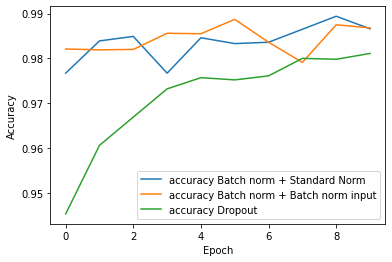

In [32]:
plt.plot(model_history1.history['val_accuracy'], label = 'accuracy Batch norm + Standard Norm')
plt.plot(model_history2.history['val_accuracy'], label = 'accuracy Batch norm + Batch norm input')
plt.plot(model_history3.history['val_accuracy'], label = 'accuracy Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


5. Now train the network using both batch normalization and dropout. How does the performance (test accuracy) of the network compare with the cases with dropout alone and with batch normalization alone ? 

add batch any case
batch normalizaiotn and dropout. 

In [33]:
model4 = Sequential()
# model.add(norm_layer)
model4.add(tf.keras.layers.BatchNormalization(input_shape=  X_train.shape[1:]))
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(Conv2D(6, 5, activation='tanh',input_shape=  X_train.shape[1:] ))

model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.AveragePooling2D(2))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(Conv2D(16, 5, padding='valid', activation='tanh'))




model4.add(tf.keras.layers.AveragePooling2D(2))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))

model4.add(Flatten())
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(Dense(84, activation='tanh'))

model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(Dense(10, activation='softmax'))

In [36]:
model4.build()
model4.summary()
model4.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model_history4 = model4.fit(X_train, Y_train,epochs= 10,batch_size=100,validation_data=(X_test, Y_test))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_38 (Bat  (None, 32, 32, 1)        4         
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 32, 32, 1)         0         
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 batch_normalization_39 (Bat  (None, 28, 28, 6)        24        
 chNormalization)                                                
                                                                 
 average_pooling2d_18 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                     

How does the performance (test accuracy) of the network compare with the cases with dropout alone and with batch normalization alone ? 

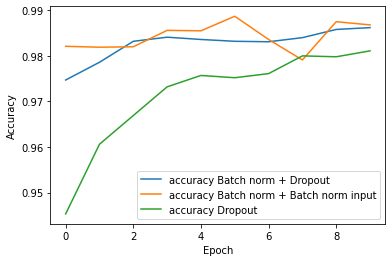

In [37]:
plt.plot(model_history4.history['val_accuracy'], label = 'accuracy Batch norm + Dropout')
plt.plot(model_history2.history['val_accuracy'], label = 'accuracy Batch norm + Batch norm input')
plt.plot(model_history3.history['val_accuracy'], label = 'accuracy Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')